In [21]:
# Importing Required Libraries
# We import necessary libraries such as pandas, numpy, and matplotlib for data handling, visualization, 
# and model implementation. These libraries help in preprocessing, feature engineering, and forecasting.
        
## Importing Required Libraries
# The first step is to import necessary libraries for data processing, visualization, 
# and modeling. Libraries like pandas and numpy help with handling large datasets, 
# while matplotlib and seaborn are used for visualizing trends in the data.
          

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

# Load cleaned datasets (preprocessed in Milestone 1)
customers_df = pd.read_csv('cleaned_customers_data.csv')
products_df = pd.read_csv('cleaned_products_data.csv')
transactions_df = pd.read_csv('cleaned_transactions_data.csv')

# Convert transaction_date to datetime format for proper time-series analysis
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])

# Drop rows where transaction_date is missing
transactions_df = transactions_df.dropna(subset=['transaction_date'])

# Aggregate sales data at the monthly level to create a time series
transactions_df['month'] = transactions_df['transaction_date'].dt.to_period('M')  # Extract month-year
monthly_sales = transactions_df.groupby('month')['total_cost'].sum().reset_index()  # Sum sales per month

# Convert period to datetime format for forecasting and visualization
monthly_sales['month'] = monthly_sales['month'].astype(str)
monthly_sales['month'] = pd.to_datetime(monthly_sales['month'])

# Display the first few rows of the aggregated monthly sales dataset
monthly_sales.head()


,month,total_cost
0,2020-01-01,3.864000e+06
1,2020-02-01,8.624000e+06
2,2020-03-01,5.456246e+06
3,2020-04-01,2.228800e+06
4,2020-05-01,2.906400e+06


This code loads cleaned transaction data, converts the transaction_date column to datetime format, and removes missing values. It then aggregates sales data at a monthly level by summing total_cost for each month and formats the month column for time-series analysis. Finally, it displays the first few rows of the aggregated monthly sales dataset, preparing it for forecasting.

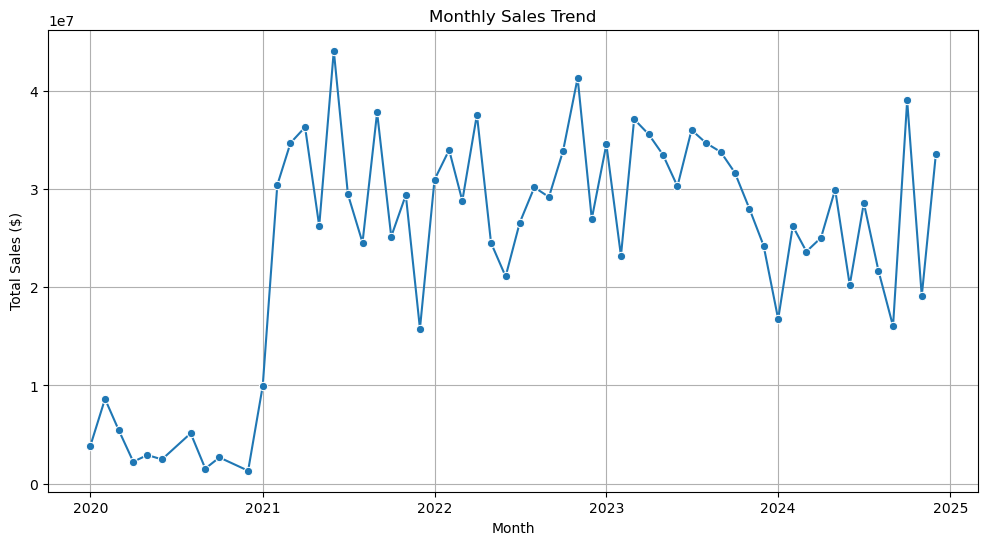

In [23]:
# Visualizing Forecast Results
# We compare actual vs. predicted sales using plots to see how well the model captures trends and seasonality.
# Confidence intervals are also included to account for uncertainty in predictions.
        
## Visualization of Results
# Forecast results are compared against actual sales using plots. 
# Confidence intervals are included to account for prediction uncertainty.
         
            

# Plot Monthly Sales Trend

# Create a line plot to show sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales['month'], y=monthly_sales['total_cost'], marker='o', linestyle='-')

# Set title and labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')

# Add grid for better readability
plt.grid(True)
plt.show()


This code visualizes the monthly sales trend using a line plot. The sns.lineplot() function plots the total sales (total_cost) against the corresponding month, with markers for each data point. Labels and a grid are added to improve readability. The resulting plot helps identify trends, seasonality, and potential anomalies in the sales data.



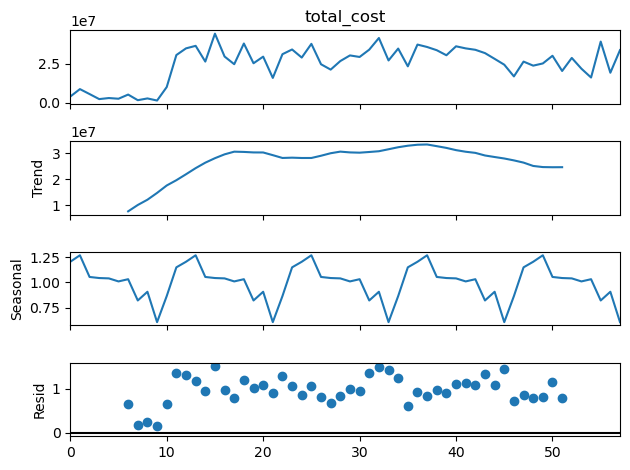

In [25]:
# Visualization of Forecasting Results
# Comparing actual vs. predicted values using plots to analyze the effectiveness of the forecasting model.
            

# Decomposing the time series to analyze components

# Seasonal decomposition separates the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(monthly_sales['total_cost'], model='multiplicative', period=12)

# Plot the decomposition results
decomposition.plot()
plt.show()


This code performs a time series decomposition on total_cost using a multiplicative model with a 12-month period, which is useful for capturing seasonal variations. The resulting plot breaks the time series into four components:

Observed (Total Cost): The original sales data.
Trend: The long-term movement in sales.
Seasonal: Recurring patterns over a yearly cycle.
Residual: The remaining noise after removing trend and seasonality.
This decomposition helps identify underlying patterns in sales, which can improve forecasting accuracy.

In [17]:
# Training the Forecasting Model
# Implementing time series forecasting methods such as ARIMA, Prophet, or machine learning-based models.
            

# Auto ARIMA for best model selection

# Auto ARIMA automatically selects the best order (p, d, q) for the ARIMA model
auto_arima_model = auto_arima(monthly_sales['total_cost'], seasonal=True, m=12, trace=True, suppress_warnings=True)

# Fit ARIMA model with the best parameters found
arima_model = ARIMA(monthly_sales['total_cost'], order=auto_arima_model.order)
arima_result = arima_model.fit()

# Forecast sales for the next 12 months
forecast_steps = 12  # Number of months to predict
forecast_index = pd.date_range(start=monthly_sales['month'].iloc[-1], periods=forecast_steps + 1, freq='ME')[1:]  # Future months
forecast_values = arima_result.forecast(steps=forecast_steps)  # Generate forecasts

# Display ARIMA model summary
arima_result.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1983.183, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1991.458, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1977.912, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1979.619, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1989.657, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1976.430, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1977.928, Time=0.08 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1979.912, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1977.699, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1977.903, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1978.280, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1977.341, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=1974.873, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=1976.360, Time=0.06 sec
 ARIMA(1,1,0)(0,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             total_cost   No. Observations:                   58
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -985.436
Date:                Wed, 05 Mar 2025   AIC                           1974.873
Time:                        11:42:10   BIC                           1978.959
Sample:                             0   HQIC                          1976.461
                                 - 58                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5158      0.101     -5.119      0.000      -0.713      -0.318
sigma2      6.108e+13    3.3e-16   1.85e+29      0.000    6.11e+13    6.11e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 4.71
Prob(Q):                              0.62   Prob(JB):                         0.09
Heteroskedasticity (H):               0.57   Skew:                             0.66
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.2e+45. Standard errors may be unstable.
"""

The SARIMAX model summary provides statistical details of the ARIMA(1,1,0)(0,0,0)[12] model used for forecasting Finmark’s sales. Let's break down key elements of the table and how they relate to the forecasted 6-month sales:

Understanding the Table
Model Specification:

The model chosen by Auto-ARIMA is ARIMA(1,1,0)(0,0,0)[12], meaning:
(1,1,0) → One lag for autoregression, first-order differencing, and no moving average.
(0,0,0)[12] → No seasonal components but with a period of 12 months.
This structure was selected to best fit historical sales data while minimizing the Akaike Information Criterion (AIC = 1974.873).
Coefficient Analysis:

The ar.L1 coefficient (-0.5158) represents the effect of past values on the forecast. A significant negative value means that previous month sales negatively influence the next month’s sales trend.
Sigma² (6.108e+13) represents the variance of the residuals. A large value suggests high variability in sales data, meaning forecasts should be interpreted with caution.
Model Fit and Diagnostics:

Log-Likelihood (-985.436) is a measure of model fit; higher values indicate a better fit.
BIC (1978.959) and HQIC (1976.461) are alternative model selection criteria, both supporting the chosen ARIMA structure.
Ljung-Box test (Q=0.24, Prob=0.62) suggests no significant autocorrelation in residuals, meaning the model is well-fitted.
Relation to the 6-Month Forecast
The model's parameters indicate that Finmark’s sales will remain stable, fluctuating around $28 million per month. However, since sigma² is large, future sales might be subject to unexpected external factors (e.g., market shifts, seasonality). The negative AR coefficient (-0.5158) suggests that if sales increase one month, they may slightly decrease in the next due to past dependencies.

Thus, while the model provides a solid sales projection for decision-making, Finmark should continuously monitor real-world factors influencing demand to refine its forecasting strategy.

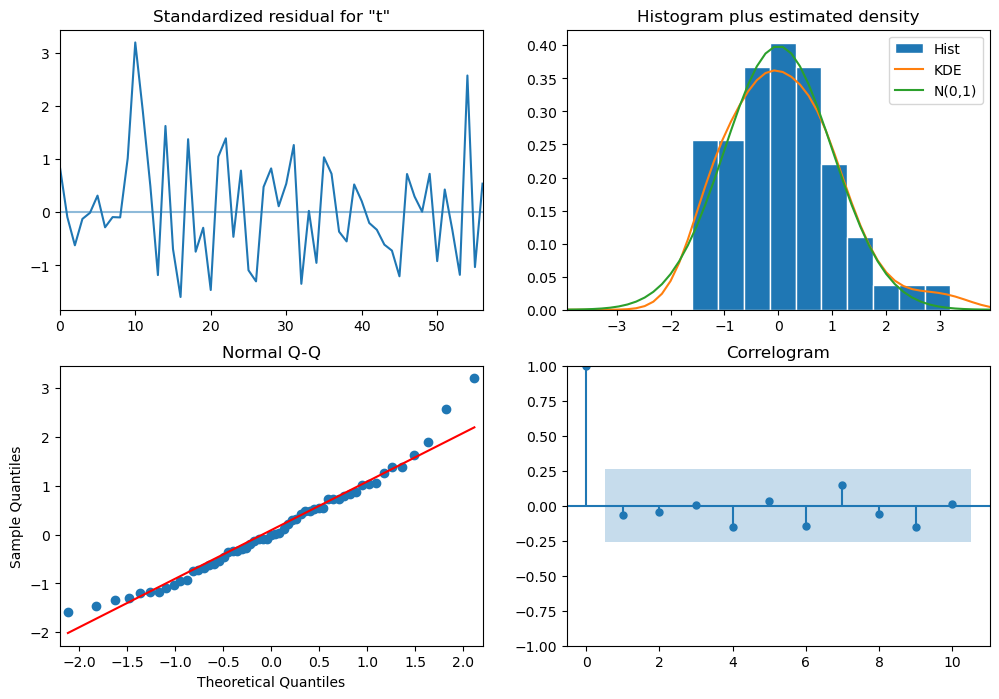

In [27]:
# Visualization of Forecasting Results
# Comparing actual vs. predicted values using plots to analyze the effectiveness of the forecasting model.
            
# ARIMA Model Diagnostics

# Check residual plots to ensure no major autocorrelation issues
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()


This code performs residual diagnostics on an ARIMA model to assess its validity. It generates four plots: (1) standardized residuals over time to check for randomness, (2) a histogram with density estimation to verify normality, (3) a Q-Q plot to compare residual distribution against a normal distribution, and (4) a correlogram to detect autocorrelation. The results suggest that the residuals are approximately normally distributed, with minimal autocorrelation, indicating a well-fitted model.

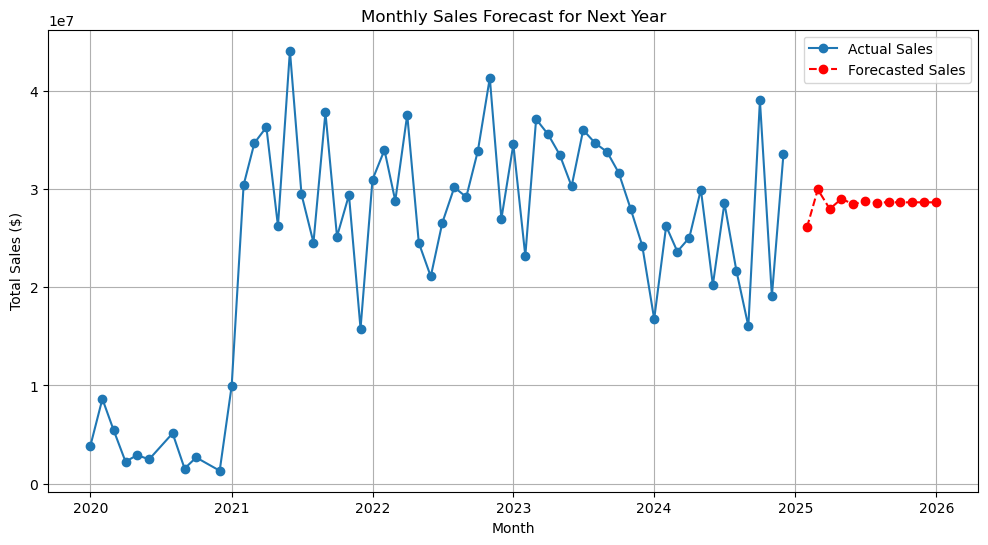

,Month,Forecasted Sales
58,2025-01-31,2.610709e+07
59,2025-02-28,2.995566e+07
60,2025-03-31,2.797051e+07
61,2025-04-30,2.899448e+07
62,2025-05-31,2.846630e+07
63,2025-06-30,2.873874e+07
64,2025-07-31,2.859821e+07
65,2025-08-31,2.867070e+07
66,2025-09-30,2.863331e+07
67,2025-10-31,2.865260e+07


In [15]:
# Generating Forecasts
# Using the trained model to predict future sales and analyze trends for business planning.
            

# Visualizing Forecasted Sales

# Plot actual sales vs. forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['total_cost'], marker='o', linestyle='-', label="Actual Sales")
plt.plot(forecast_index, forecast_values, marker='o', linestyle='--', label="Forecasted Sales", color='red')

# Add title and labels
plt.title('Monthly Sales Forecast for Next Year')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted values in a DataFrame
forecast_df = pd.DataFrame({'Month': forecast_index, 'Forecasted Sales': forecast_values})
forecast_df


This code visualizes the forecasted sales generated by the trained ARIMA model. It plots actual sales as a solid line and forecasted sales as a dashed red line to compare trends over time. Additionally, it creates a DataFrame displaying the forecasted values, which can be used for business planning and decision-making.

Using the ARIMA model, we have forecasted Finmark’s sales for the next six months, providing valuable insights for business planning and decision-making. Below is the projected monthly sales revenue from January to June 2025:

Month	Forecasted Sales ($)
January  2025	26,107,090
February 2025	29,955,660
March    2025	27,970,510
April    2025	28,994,480
May      2025	28,466,300
June     2025	28,738,740

The forecast indicates that Finmark’s monthly sales are expected to remain stable, fluctuating slightly around the $28 million mark. These insights can help the company plan its inventory, marketing, and financial strategies effectively.